# 1.0 Import Libraries

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.0 Download Data

The brazilian stock VALE3 was chosen for our analysis

In [28]:
df=yf.download("VALE3.SA",start="2019-01-01",progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,50.009998,51.369999,49.790001,51.090000,40.610809,17319600
2019-01-03,50.799999,50.939999,48.400002,49.000000,38.949493,30120000
2019-01-04,49.820000,52.450001,49.820000,52.189999,41.485176,43360100
2019-01-07,52.869999,53.650002,51.720001,51.910000,41.262615,20998900
2019-01-08,52.200001,52.799999,51.619999,52.410000,41.660053,19925600
...,...,...,...,...,...,...
2021-12-09,74.889999,75.949997,74.449997,75.180000,75.180000,16925200
2021-12-10,75.500000,76.199997,74.839996,75.650002,75.650002,16827100
2021-12-13,77.500000,78.730003,77.389999,77.860001,77.860001,31699100


# 3.0 Set Log Returns

In [29]:
df["Log_Returns"]=np.log(1+df["Adj Close"].pct_change())
df

,Open,High,Low,Close,Adj Close,Volume,Log_Returns
Date,,,,,,,
2019-01-02,50.009998,51.369999,49.790001,51.090000,40.610809,17319600,NaN
2019-01-03,50.799999,50.939999,48.400002,49.000000,38.949493,30120000,-0.041769
2019-01-04,49.820000,52.450001,49.820000,52.189999,41.485176,43360100,0.063070
2019-01-07,52.869999,53.650002,51.720001,51.910000,41.262615,20998900,-0.005379
2019-01-08,52.200001,52.799999,51.619999,52.410000,41.660053,19925600,0.009586
...,...,...,...,...,...,...,...
2021-12-09,74.889999,75.949997,74.449997,75.180000,75.180000,16925200,-0.007685
2021-12-10,75.500000,76.199997,74.839996,75.650002,75.650002,16827100,0.006232
2021-12-13,77.500000,78.730003,77.389999,77.860001,77.860001,31699100,0.028795


# 4.0 Garman Klass Daily

In [30]:
df["Garman_Klass_Day"]=0.5*(np.log(df["High"]/df["Low"]))**2-(2*np.log(2)-1)*np.log(df["Close"]/df["Open"])**2

# 5.0 Annualized & Results 

In [31]:
mean=np.sqrt(df["Garman_Klass_Day"].mean())
print(f"Annual Volatility: {mean*np.sqrt(252)*100:.2f}%")

Annual Volatility: 31.04%


# 6.0 Plot Daily Volatity

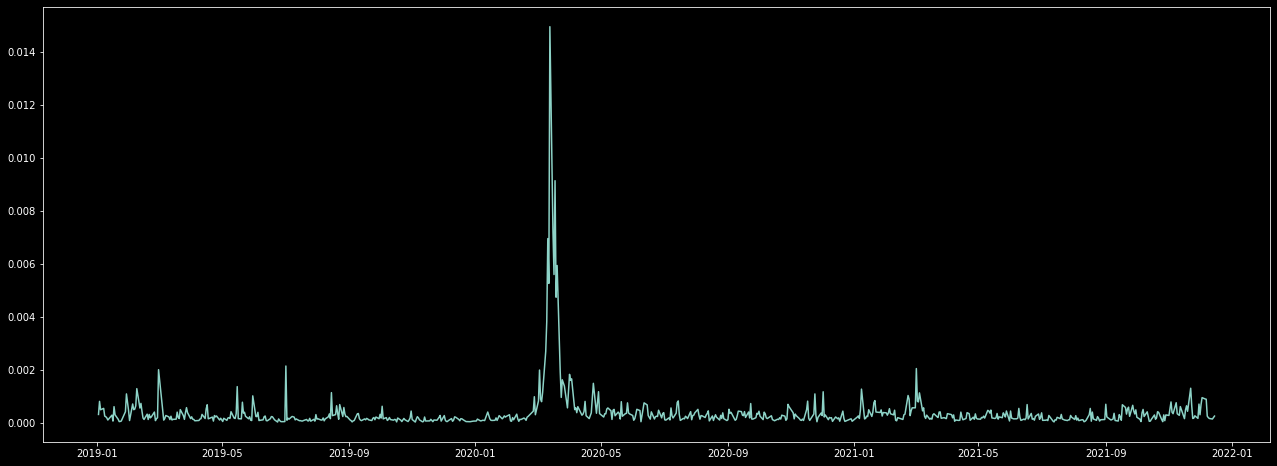

In [37]:
plt.style.use("dark_background")
plt.figure(figsize=(22,8))
plt.plot(df["Garman_Klass_Day"])
